<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/data_and_pre-processing/filter_low_device_count_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we want to clean our data a little bit, since some counties data have really low device_count, they might be noise in the data, and we want to get rid of these data.

## 1. load old dataset

In [1]:
# before doing this connect colab to google drive.
ls

drive/  sample_data/


In [2]:
# go to the place on my google drive that stores the data
cd drive/My\ Drive/data

/content/drive/My Drive/data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# agg_social_dist_2 data includes data about each county on each date,
# including the counties without shelter in place order.
data = pd.read_csv("agg_social_dist_2.csv")

In [7]:
data.shape

(414853, 19)

In [25]:
data.head()

,date_range_start,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,Date - first case,Date - shelter in place
0,2020-01-01T00:00:00+10:00,66.0,GU,Guam,66010,-75.0,NaN,0.0,310,98,41,72,0.0,395.312903,NaN,NaN,3.722158e+06,2020-03-16,NaN
1,2020-01-01T00:00:00+10:00,69.0,MP,Rota Municipality,69100,-90.0,NaN,0.0,8,1,1,1,0.0,1069.000000,NaN,NaN,7.430000e+02,2020-03-31,NaN
2,2020-01-01T00:00:00+10:00,69.0,MP,Saipan Municipality,69110,-90.0,NaN,0.0,303,121,33,35,0.0,779.036304,NaN,NaN,NaN,2020-03-31,NaN
3,2020-01-01T00:00:00+10:00,69.0,MP,Tinian Municipality,69120,-90.0,NaN,0.0,12,1,1,3,0.0,0.000000,NaN,NaN,2.156500e+04,2020-03-31,NaN
4,2020-01-01T00:00:00-04:00,23.0,ME,Aroostook County,23003,-93.0,-91.0,0.0,56,20,5,7,0.0,477.000000,NaN,NaN,2.278000e+04,2020-04-03,2020-04-01 00:00:00


## 2. look at distribution of device_counts of some counties

In [71]:
# Guam county's county_code = 66010.
data[data['county_code'] == 66010]['device_count'].values

array([ 310, 4382, 4376, 4311, 4284, 4368, 4232, 4269, 4252, 4240, 4252,
       4158, 4241, 4150, 4138, 4145, 4107, 4094, 4039, 4060, 4084, 4003,
       3982, 4074, 3965, 3917, 4017, 3967, 3899, 3904, 3845, 4494, 4564,
       4476, 2871,  310,  261,  279,  253,  286,  257,  238,  256,  224,
        225,  217,  189,  199,  258,  270,  255,  278,  230,  242,  258,
        257,  234,  310, 4131, 4747, 4703, 4740, 4642, 4622, 4637, 4608,
       4550, 4503, 4511, 4474, 4477, 4435, 4493, 4464, 4311, 4467, 4299,
       4286, 4304, 4181, 3896, 3933, 4095, 4103,  539,  244,  228,  227,
        261,  254,  249,  410,  384,  330,  365,  349,  403,  279,  308,
        295,  302,  215,  227,  216,  279,  248,  277,  254,  217,  222,
        213,  224,  234,  236,  205,  263,  259,  272,  264,  301, 3591,
       3939, 4077, 4107, 4085, 4023, 3955])

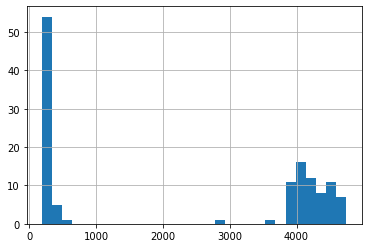

In [72]:
# Guam's distribution of device_counts across 120 ish days
data[data['county_code'] == 66010]['device_count'].hist(bins = 30)

we can see that Guam's distribution of device_counts is bimodel, clustering around 4000 and 300. This might be noise in data - sometimes less devices are counted? (don't really know how this piece of data is really collected in real life)

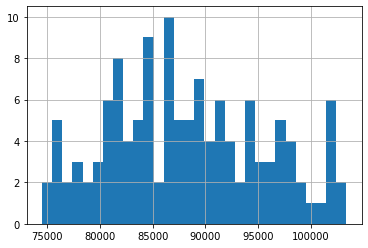

In [60]:
# King County Seattle has county_code of 53033
data[data['county_code'] == 53033]['device_count'].hist(bins = 30)

We see that king county, seattle's distribution is way better, approximately normal, the measuring of device_count in this county is less noisy than in Guam.

Look at distribution of all device_count across all dates.

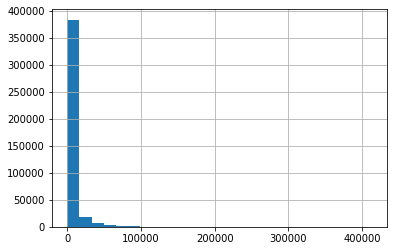

In [73]:
data['device_count'].hist(bins = 25)

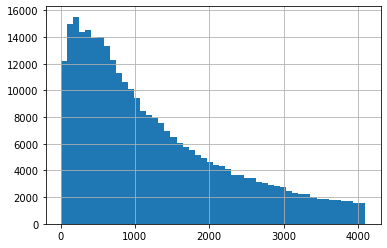

In [74]:
# look at distribution of device_count < 4100
data[data['device_count'] < 4100]['device_count'].hist(bins=50)

We see a lot of county data have really low device_count by the above histogram. Let's make a choice of **filtering out all the county data that have $\le$ 200 device_counts**, because they might be unreliable.

In [69]:
# there are 30000 data points with less than 200 device_count.
data[data['device_count'] <= 200].shape[0]

32949

## 3. filter data.

In [75]:
data = data[data['device_count'] > 200]

In [76]:
data.shape

(381904, 19)

In [78]:
# save to another csv file.
data.to_csv("agg_social_dist_withuot_low_device_count", index=False)